### MNIST-RNN
- [참고]
  - http://www.modulabs.co.kr/DeepLAB_free/2107
  - https://github.com/tgjeon/TensorFlow-Tutorials-for-Time-Series/blob/master/mnist-rnn.ipynb

In [14]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sess = tf.InteractiveSession()

- 데이터 준비 사전 연습

In [4]:
batch_size = 3
n_inputs = 5
n_steps = 5

values = []
for i in range(0, batch_size):
    values.append([])
    for j in range(0, n_steps):
        values[i].append([])
        for k in range(0, n_inputs):
            values[i][j].append(k + (i * 5))
print values

m = tf.constant(value = values)
print m
print m.eval()
print

r1 = tf.transpose(m, [1, 0, 2])
print r1
print r1.eval()
print

r2 = tf.reshape(r1, [-1, n_inputs])
print r2
print r2.eval()
print

r3 = tf.split(0, n_steps, r2)
print r3
for item in r3:
    print item.eval()

[[[0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4]], [[5, 6, 7, 8, 9], [5, 6, 7, 8, 9], [5, 6, 7, 8, 9], [5, 6, 7, 8, 9], [5, 6, 7, 8, 9]], [[10, 11, 12, 13, 14], [10, 11, 12, 13, 14], [10, 11, 12, 13, 14], [10, 11, 12, 13, 14], [10, 11, 12, 13, 14]]]
Tensor("Const:0", shape=(3, 5, 5), dtype=int32)
[[[ 0  1  2  3  4]
  [ 0  1  2  3  4]
  [ 0  1  2  3  4]
  [ 0  1  2  3  4]
  [ 0  1  2  3  4]]

 [[ 5  6  7  8  9]
  [ 5  6  7  8  9]
  [ 5  6  7  8  9]
  [ 5  6  7  8  9]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [10 11 12 13 14]
  [10 11 12 13 14]
  [10 11 12 13 14]
  [10 11 12 13 14]]]

Tensor("transpose:0", shape=(5, 3, 5), dtype=int32)
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]]

 [[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]]

 [[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]]

 [[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]]

 [[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]]]

Tensor("Reshape:0", shape

In [2]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [7]:
# configuration
#                        output[-1] * W + b -> 10 labels for each image, output[-1]:[? 28], W:[28 10], B:[10]
#                       ^ (O: output 28 vec from 28 vec input)
#                       |
#      +-+  +-+       +--+
#      |1|->|2|-> ... |28| n_steps = 28
#      +-+  +-+       +--+
#       ^    ^    ...  ^
#       |    |         |
# img1:[28] [28]  ... [28]
# img2:[28] [28]  ... [28]
# img3:[28] [28]  ... [28]
# ...
# img128 or img256 (batch_size or test_size 256)
# each n_inputs = n_state_units = 28

In [3]:
batch_size = 128
n_inputs = 28
n_steps = 28

x = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
xt = tf.transpose(x, [1, 0, 2])
xr = tf.reshape(xt, [-1, n_inputs])
xs = tf.split(0, n_steps, xr)

In [5]:
with tf.variable_scope("foo"):
    n_state_units = 28    
    #rnn_cell = tf.nn.rnn_cell.BasicLSTMCell(num_units = n_state_units, forget_bias=1.0)
    rnn_cell = tf.nn.rnn_cell.BasicRNNCell(num_units = n_state_units)
    outputs, state = tf.nn.rnn(rnn_cell, xs, dtype=tf.float32)
    print rnn_cell.output_size
    print len(outputs)
    print outputs[-1]

28
28
Tensor("foo_1/RNN/BasicRNNCell_27/Tanh:0", shape=(?, 28), dtype=float32)


In [6]:
with tf.variable_scope("foo"):
    n_classes = 10

    W = tf.Variable(tf.random_normal([n_state_units, n_classes]))
    B = tf.Variable(tf.random_normal([n_classes]))
    
    pred = tf.matmul(outputs[-1], W) + B

    y = tf.placeholder(tf.float32, [None, n_classes])

Total batch: 430
epoch: 0, error_value: 0.883994
test accuracy: 0.695900

epoch: 1, error_value: 0.602062
test accuracy: 0.795400

epoch: 2, error_value: 0.465341
test accuracy: 0.854000

train complete!
Error Index: 1, Prediction: 5, Ground Truth: 2
Error Index: 8, Prediction: 3, Ground Truth: 5
Error Index: 18, Prediction: 5, Ground Truth: 3
Error Index: 30, Prediction: 5, Ground Truth: 3
Error Index: 33, Prediction: 6, Ground Truth: 4
Error Index: 46, Prediction: 5, Ground Truth: 1
Error Index: 48, Prediction: 9, Ground Truth: 4


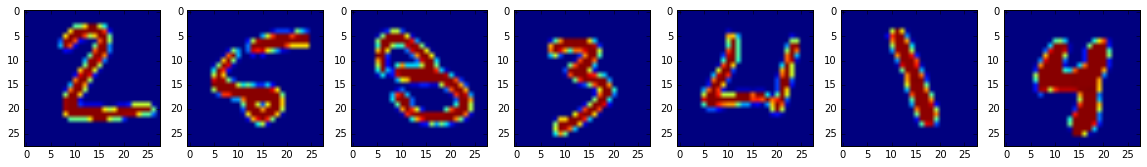

In [32]:
%matplotlib inline

learning_rate = 0.001
display_step = 1
training_epochs = 3

error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(error)

correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

def printLossAccuracyForTestData(epoch, sess):
    test_data = mnist.test.images.reshape((-1, n_steps, n_inputs))
    test_labels = mnist.test.labels
    accuracy_value, error_value = sess.run((accuracy, error), feed_dict={x: test_data, y: test_labels})
    print "epoch: %d, error_value: %f" % ( epoch, error_value )
    print "test accuracy: %f" % (accuracy_value,) 
    print

def printFalsePrediction(epoch, sess, numPrintImages):
    test_data = mnist.test.images.reshape((-1, n_steps, n_inputs))
    test_labels = mnist.test.labels
    correct_pred_value = sess.run(correct_pred, feed_dict={x: test_data, y: test_labels})
    ground_truth = sess.run(tf.argmax(y, 1), feed_dict={y: test_labels})
    prediction = sess.run(tf.argmax(pred, 1), feed_dict={x: test_data})

    fig = plt.figure(figsize=(20, 5))
    j = 1
    for i in range(len(correct_pred_value)):
        if (j > numPrintImages):
            break;
        if (not correct_pred_value[i]):
            ground_truth_num = mnist.test.labels[i]
            print "Error Index: %s, Prediction: %s, Ground Truth: %s" % (i, prediction[i], ground_truth[i])
            img = np.array(mnist.test.images[i])
            img.shape = (28, 28)
            plt.subplot(1, numPrintImages, j)
            plt.imshow(img)
            j += 1
            

            
init = tf.global_variables_initializer()

f = open('mnist_rnn.log', 'w')
    
with tf.Session() as sess:
    sess.run(init)
    total_batch = int(math.ceil(mnist.train.num_examples / float(batch_size)))
    print "Total batch: %d" % total_batch

    for epoch in range(training_epochs):
        for i in range(total_batch):
            batch_images, batch_labels = mnist.train.next_batch(batch_size)
            batch_images = batch_images.reshape((batch_size, n_steps, n_inputs))
            _, error_value = sess.run((optimizer, error), feed_dict={x: batch_images, y: batch_labels})
            
        print >> f, 'Training - Batch: %s, Epoch: %s, - Error: %s' % (i, epoch, error_value)
        
        v_images = mnist.validation.images.reshape((mnist.validation.num_examples, n_steps, n_inputs))
        v_labels = mnist.validation.labels
        v_error_value = sess.run(error, feed_dict={x: v_images, y: mnist.validation.labels})
        print >> f, 'Validation - Batch: %s, Epoch: %s, - Error: %s' % (i, epoch, v_error_value)
            
        if epoch % display_step == 0:
            printLossAccuracyForTestData(epoch, sess)
            
    print "train complete!"
    printFalsePrediction(epoch, sess, 7)